We demonstrate how to use $k$-means clustering to segment an image into few components. Each pixel of an image is represented by a vector $\mathbf{x}^{(i)}$ containing the red, green and blue values of the $i$th pixel. An image consisting of $W \times H$ pixels corresponds to a data set of $W \cdot H$ pixels which we can cluster using $k$-means. 

In [64]:
from skimage import io

picture = io.imread("https://raw.githubusercontent.com/alexjungaalto/ResearchPublic/master/Clustering/IMG_1211.JPG")

In [65]:
print(picture.shape)  # plot width, hight and number of features of pixels
dimensions = picture.shape
width =picture.shape[0]
height=picture.shape[1]
channels=picture.shape[2]

(215, 286, 3)


In [66]:
from sklearn.cluster import KMeans
import numpy as np

nr_clusters = 4    # nr of clusters we want to group the pixels into 

picture = picture.reshape(-1,channels)
kmeans = KMeans(n_clusters=nr_clusters, random_state=0).fit(picture)

In [67]:
pixel_cluster=kmeans.predict(picture)  # numpy array 'pixel_cluster' stores for each pixel the cluster it is assigned to

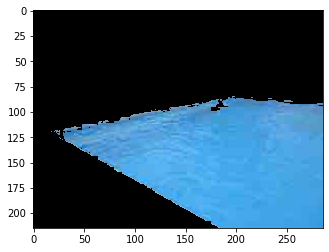

In [68]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

masked_image = 0*picture 
masked_image[pixel_cluster==2,:] = picture[pixel_cluster==2,:]
masked_image = masked_image.reshape(width,height,channels)

plt.imshow(masked_image)
plt.show()

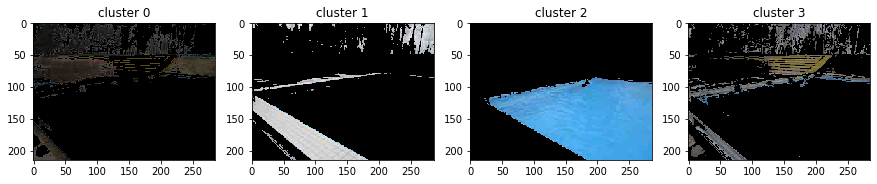

In [69]:
fig, axes = plt.subplots(1, nr_clusters, figsize=(15, 5))

for iter_cluster in range(nr_clusters):
    masked_image = 0*picture 
    masked_image[pixel_cluster==iter_cluster,:] = picture[pixel_cluster==iter_cluster,:]
    masked_image = masked_image.reshape(width,height,channels)
    axes[iter_cluster].imshow(masked_image)  
    texttitle="cluster %d" % iter_cluster
    axes[iter_cluster].title.set_text(texttitle)

range(0, 4)
